This is a program for plotting weather delays that occurred on a given route between any 2 airports from May 2017 to April 2018
To produce your plot, please input abbreviations for origin and destination --> <ORI DES>:


 MCO MIA


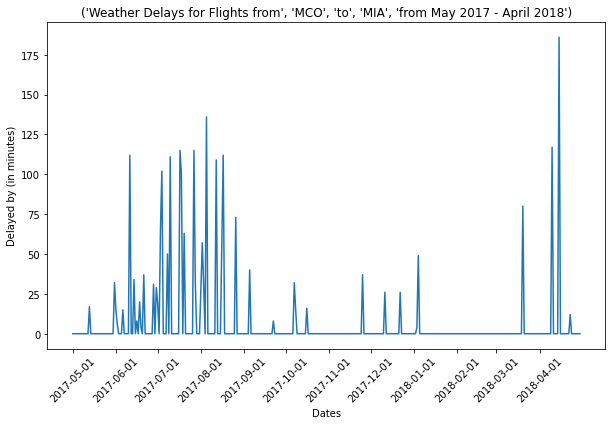

In [43]:
# This is a script I created with the idea that a person may need to fly from city A to city B, but gets motion sickness to the point that any turbulence would make the trip unbearable.
# The thinking is that they could use this script to check historical flight data and see what times of year the weather is most likely to influence flight conditions.
# I have used weather delays as a proxy for 'likelihood of turbulence', although not likelihood of turbulence for a specific flight but rather the likelihood of turbulence
# at a given time of year. This isn't the best approximation; it can certainly be improved upon.


# import necessary packages
import pandas as pd
import matplotlib.pylab as plt
import datetime
import math

# define function to plot data
def plot(z, a, b):
    fig, ax = plt.subplots(figsize=(10, 6))
    # sort dictionary keys numerically and return a list of tuples
    lists = sorted(z.items())
    # parse tuples into a pair of lists to be used as values for the x and y axes of my graph
    x, y = zip(*lists)
    # plot the graph
    ax.plot(x, y)
    # displays plot
    ax.set(title = ("Weather Delays for Flights from", a, "to", b, "from May 2017 - April 2018"),
       xlabel = "Dates",
       ylabel = "Delayed by (in minutes)")
    plt.xticks(['2017-05-01','2017-06-01','2017-07-01','2017-08-01','2017-09-01','2017-10-01','2017-11-01','2017-12-01','2018-01-01','2018-02-01','2018-03-01','2018-04-01'])
    plt.xticks(rotation=45)
    plt.show()

# reduce number of columns to import from csv to make data more manageable
columns=['FL_DATE','ORIGIN','DEST','WEATHER_DELAY']

# open an empty dictionary to receive dates and their associated delay values
values = {}

# read data into pandas
df=pd.read_csv("/blue/bsc4452/share/Class_Files/data/flights.May2017-Apr2018.csv", usecols=columns)

# ask for input of ORIGIN, DEST
print('This is a program for plotting weather delays that occurred on a given route between any 2 airports from May 2017 to April 2018')
print('To produce your plot, please input abbreviations for origin and destination --> <ORI DES>:')
ori, des = input().split()

# create new dataframe object from subset of origin/destination data
dataset = df[(df.ORIGIN.isin([ori])) & (df.DEST.isin([des]))]

# loop through data and append dictionary with each day and its associated flight delay data
for i in dataset.itertuples(): 
    date = i[1]
    delay = i[4]
    # assign a plot-able value to null values
    if math.isnan(delay) == True:
        delay = 0.0
    if date in values:
        if delay >= values[date]:
            values[date] = delay
        else:
            continue
    else:
        values[date] = delay
        continue
        
#plot data        
plot(values, ori, des)
